# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.37296368538830343
rmse median 0.45284554632180635


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.1485888550522994
mean error unbiased -0.006686997561015984


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [6]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

No handles with labels found to put in legend.


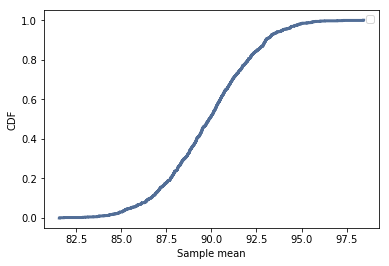

In [7]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(xbars)

89.84201175851206

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.53597307865131, 93.94394758535867)

And the RMSE of the sample means is called the standard error.

In [10]:
stderr = RMSE(xbars, 90)
stderr

2.5421196519482234

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
    
    
Estimate3()

rmse L 1.1088465917132826
rmse Lm 2.001146602255649
mean error L 0.37280755452207975
mean error Lm 0.5575015330226026


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

*I take this to mean, calculate the **(A)**`MeanError` of $\bar{x}$ and median-based estimate of $\mu$, and **(B)**`MSE` of $S^2$ and $S^2_{n-1}$*

In [12]:
# A

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def MSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return mse

###

n=7
m=100000

mu = 0
sigma = 1

means = []
medians = []
for _ in range(m):
    xs = [random.gauss(mu, sigma) for _ in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median)
    
print('Experiment 1')
print('MeanError xbar', MeanError(means, mu))
print('MeanError median', MeanError(medians, mu))

estimates1 = []
estimates2 = []
for _ in range(m):
    xs = [random.gauss(mu, sigma) for _ in range(n)]
    biased = np.var(xs)
    unbiased = np.var(xs, ddof=1)
    estimates1.append(biased)
    estimates2.append(unbiased)

print('Experiment 2')
print('MSE biased', RMSE(estimates1, sigma**2))
print('MSE unbiased', RMSE(estimates2, sigma**2))


Experiment 1
MeanError xbar -0.001001260279758093
MeanError median -0.001037880010908367
Experiment 2
MSE biased 0.5155728699368899
MSE unbiased 0.5783605482762881


**(A)** MeanError of $\bar{x}$ is quite comparable to that of median-based calculation. The error values are quite low (and get lower with increasing $m$, with a rather small sample size (7), so perhaps the estimators are unbiased?

**(B)** $S^2_{n-1}$ produces a consisntently (with increasing $m$) lower (R)MSE than $S^2$. 

## **Exercise:** 
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



No handles with labels found to put in legend.


rmse L 0.8116682687972935
mean error L 0.20922526379561374
(1.2602305466329098, 3.731222282749347)


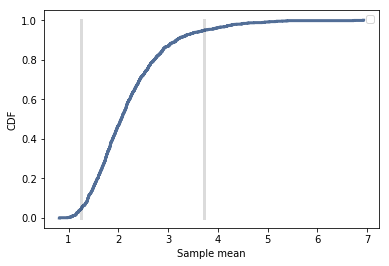

In [37]:
n = 10
m = 1000
lam = 2

def exp5(n=10,m=1000):
    means = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam,n)
        L = 1 / np.mean(xs)
        means.append(L)

    print('rmse L', RMSE(means, lam))
    print('mean error L', MeanError(means, lam))
    
    return means, RMSE(means, lam)

means, rmse = exp5()

cdf = thinkstats2.MakeCdfFromList(means)
ci = cdf.Percentile(5), cdf.Percentile(95)

def VertLine(x, y=1):
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

VertLine(ci[0])
VertLine(ci[1])
    
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

print(ci)

Standard error (i.e., RMSE) is 0.76.

The 90% confidence interval range froms 1.27 to 3.50 (5th percentile to 95th percentile). 

In [41]:
ns = [5,10,50,100]
ns = range(5,100)

rmses = []
for sample_size in ns:
    means, rmse = exp5(n=sample_size)
    rmses.append(rmse)
    
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

p = figure(plot_width=400, plot_height=400)

# add a line renderer
p.line(ns, rmses, line_width=2)

t = show(p, notebook_handle=True)
push_notebook(handle=t)

rmse L 1.4709274183236065
mean error L 0.5106492531976266
rmse L 1.3020150601183045
mean error L 0.40152052548240635
rmse L 1.162306369146231
mean error L 0.3889669478436941
rmse L 0.867405676863591
mean error L 0.23746301235582637
rmse L 0.8447353309851918
mean error L 0.24875620145622032
rmse L 0.7995182710250883
mean error L 0.23719943000977697
rmse L 0.7890595024572056
mean error L 0.2341609956593368
rmse L 0.7225761851185828
mean error L 0.18536436401560552
rmse L 0.6766692606674178
mean error L 0.18370901134987203
rmse L 0.6311878595434856
mean error L 0.1403851314119567
rmse L 0.5950920092561325
mean error L 0.12826120246654296
rmse L 0.6097107913332542
mean error L 0.15519463202796643
rmse L 0.5770669539997705
mean error L 0.1230345421113935
rmse L 0.5581696250795831
mean error L 0.11440194098832693
rmse L 0.5143057044469919
mean error L 0.11549899443981149
rmse L 0.5180597622060938
mean error L 0.10488904474375302
rmse L 0.492844934318689
mean error L 0.11490669289525908
rmse 

Loading BokehJS ...

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [16]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [17]:
# Solution goes here

In [18]:
# Solution goes here